<a href="https://colab.research.google.com/github/Jay0073/Forest-Fire-Detection/blob/main/Forest_Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Activation

In [ ]:
# path = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version'
path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version'

train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
validation_dir = os.path.join(path, 'val')

In [ ]:
classes = os.listdir(train_dir)
print(classes)

['nofire', 'fire']


In [ ]:
# classes diversity
for i in classes:
    print(i, len(os.listdir(os.path.join(train_dir, i))))

nofire 1157
fire 730


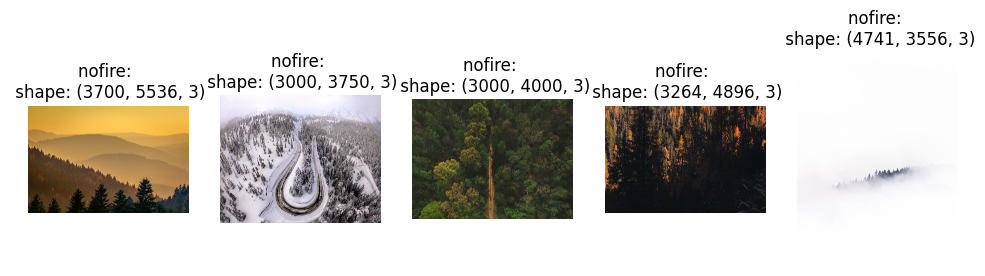

In [ ]:
# class visualization
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[0])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"{classes[0]}: \n shape: {img.shape}")
    plt.axis('off')
plt.show()

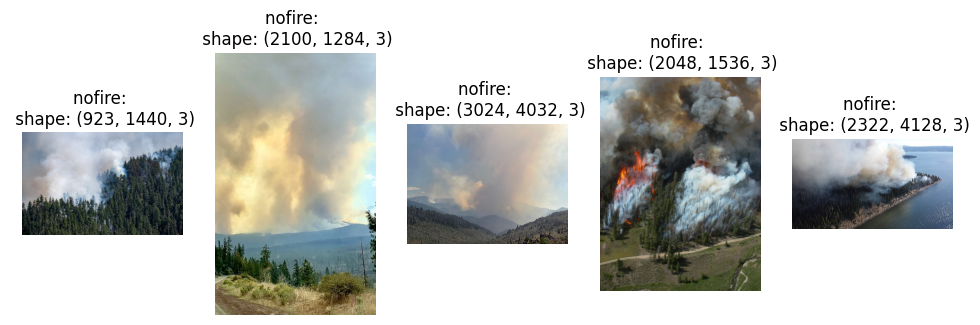

In [ ]:
# class visualization

plt.figure(figsize=(12, 10)) # Now plt.figure refers to matplotlib.pyplot.figure
for i in range(5):
    class_path = os.path.join(train_dir, classes[1])
    img_name = os.listdir(class_path)[i]
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"{classes[0]}: \n shape: {img.shape}")
    plt.axis('off')
plt.show()

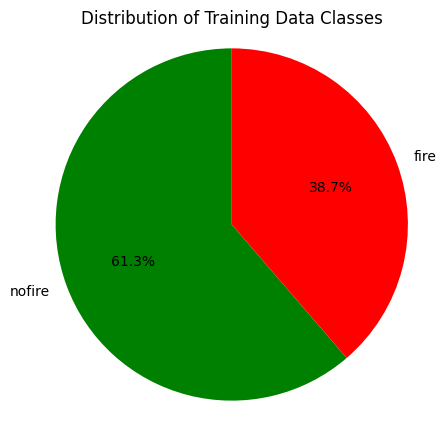

In [ ]:
# Assuming train_dir is defined as before
classes = os.listdir(train_dir)
class_counts = [len(os.listdir(os.path.join(train_dir, i))) for i in classes]

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=classes, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Training Data Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 64 # there will be 64 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

validation_data_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_data_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
# map the indices
class_mapping = train_data_generator.class_indices
print(class_mapping)

# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

{'fire': 0, 'nofire': 1}
Class Names: ['fire', 'nofire']


In [ ]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),

    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
hist = model.fit(
    train_data_generator,
    epochs=5,  # Increased epochs for training
    validation_data=validation_data_generator,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
20/30 ━━━━━━━━━━━━━━━━━━━━ 2:06 13s/step - accuracy: 0.5148 - loss: 1.7169

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


25/30 ━━━━━━━━━━━━━━━━━━━━ 1:04 13s/step - accuracy: 0.5290 - loss: 1.5791

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 510s 17s/step - accuracy: 0.5421 - loss: 1.4573 - val_accuracy: 0.6841 - val_loss: 0.5624
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 463s 16s/step - accuracy: 0.6880 - loss: 0.5575 - val_accuracy: 0.7388 - val_loss: 0.4996
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 457s 15s/step - accuracy: 0.7667 - loss: 0.4828 - val_accuracy: 0.7338 - val_loss: 0.5115
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 452s 15s/step - accuracy: 0.7802 - loss: 0.4616 - val_accuracy: 0.7736 - val_loss: 0.4552
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 516s 17s/step - accuracy: 0.7948 - loss: 0.4556 - val_accuracy: 0.7587 - val_loss: 0.4457


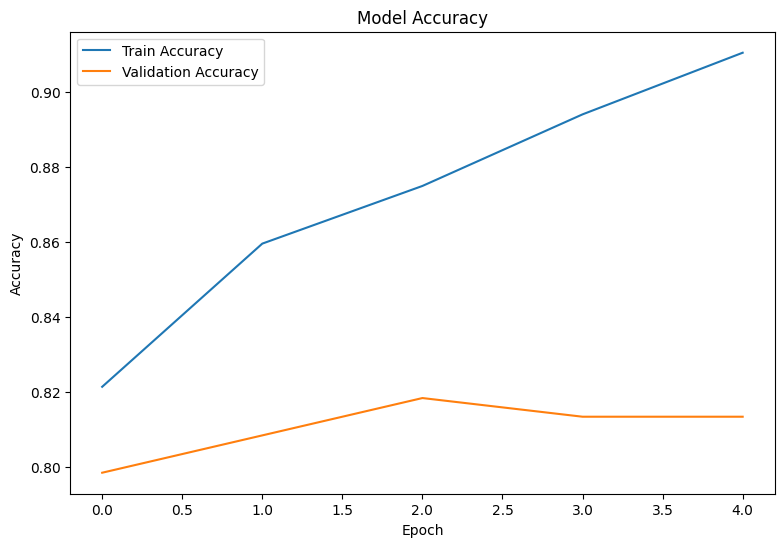

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(20, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

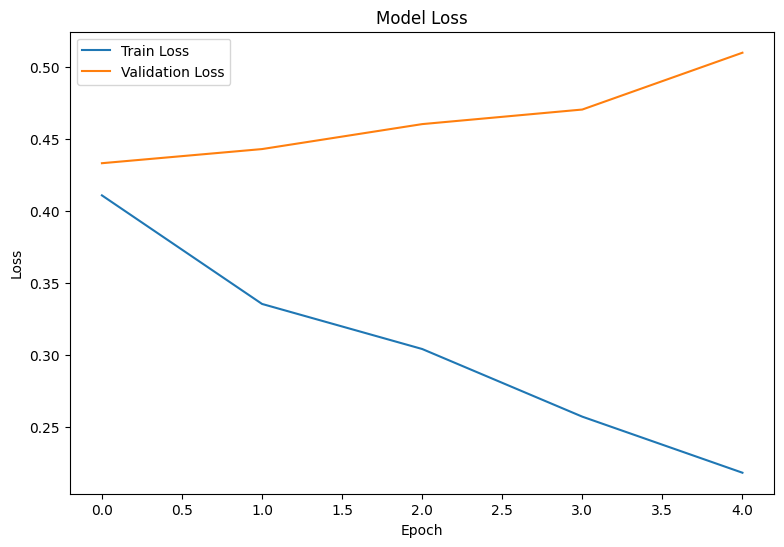

In [ ]:
# Loss Plot
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/7 ━━━━━━━━━━━━━━━━━━━━ 55s 14s/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


4/7 ━━━━━━━━━━━━━━━━━━━━ 43s 15s/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


6/7 ━━━━━━━━━━━━━━━━━━━━ 14s 15s/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 96s 14s/step


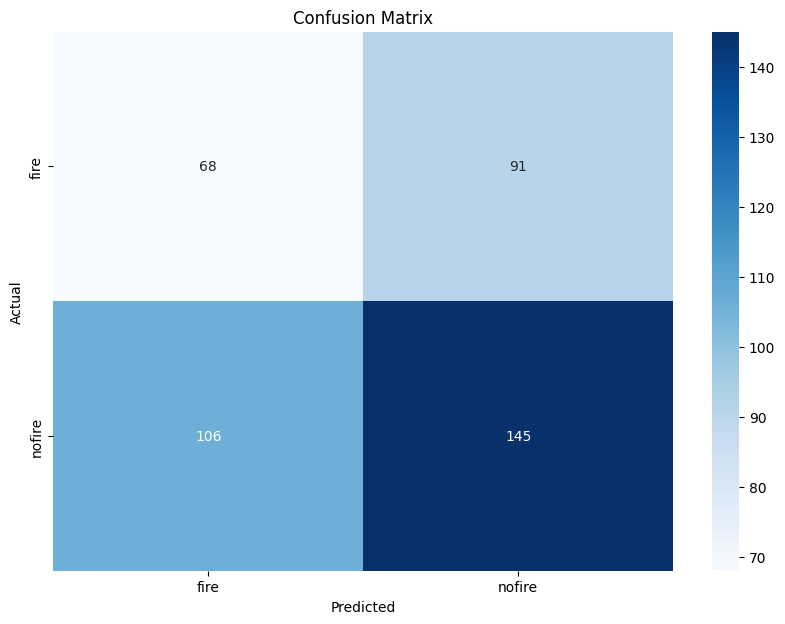

              precision    recall  f1-score   support

        fire       0.39      0.43      0.41       159
      nofire       0.61      0.58      0.60       251

    accuracy                           0.52       410
   macro avg       0.50      0.50      0.50       410
weighted avg       0.53      0.52      0.52       410



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
predictions = model.predict(test_data_generator)
predicted_classes = (predictions > 0.5).astype('int32')

# Get true classes
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

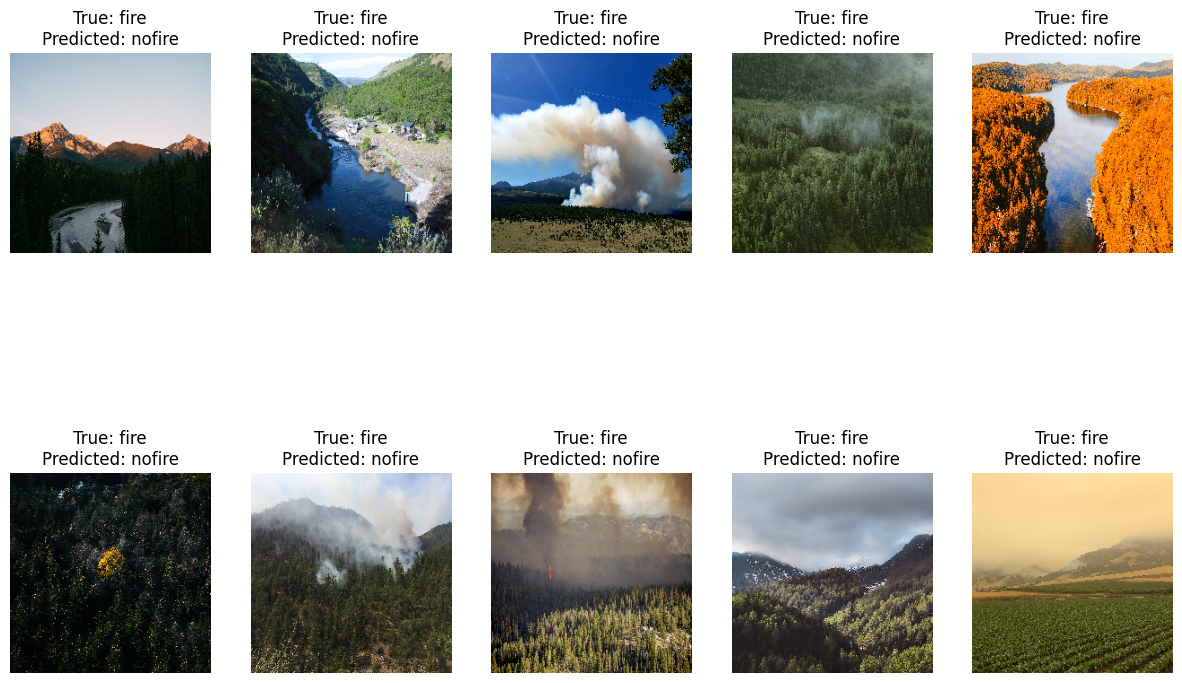

In [ ]:
# Analyze misclassifications
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

plt.figure(figsize=(15, 10))
for i, index in enumerate(misclassified_indices[:10]):  # Display first 10 misclassifications
    plt.subplot(2, 5, i+1)
    # Access the image from the test generator using the batch index and image index within the batch
    batch_index = index // test_data_generator.batch_size
    image_index = index % test_data_generator.batch_size
    image = test_data_generator[batch_index][0][image_index]
    plt.imshow(image.astype('float32'))
    plt.title(f'True: {class_labels[true_classes[index]]}\nPredicted: {class_labels[predicted_classes[index][0]]}')
    plt.axis('off')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

1/7 ━━━━━━━━━━━━━━━━━━━━ 1:31 15s/step - accuracy: 0.7969 - loss: 0.5254

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


4/7 ━━━━━━━━━━━━━━━━━━━━ 40s 13s/step - accuracy: 0.8083 - loss: 0.5183

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


5/7 ━━━━━━━━━━━━━━━━━━━━ 27s 14s/step - accuracy: 0.8066 - loss: 0.5256

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 92s 13s/step - accuracy: 0.8081 - loss: 0.5253
Test Loss: 0.5200886726379395, Test Accuracy: 0.8121951222419739


In [ ]:
# save the model if performance is good
model.save('Forest_fire_detection.keras')